Basic: Libraries Import

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Q1 : Loading all datasets

In [118]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

## Q 2 : What is the shape of "movies.csv"?


In [119]:
# shape function
movies.shape

(9742, 3)

## Q 3 : What is the shape of "ratings.csv"?


In [120]:
# shape function
ratings.shape

(100836, 4)

## Q 4 : How many unique "userId" are available in "ratings.csv"?


In [121]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [122]:
#  nunique() function

unique_userid = ratings['userId'].nunique()

unique_userid

610

## Q 5 : Which movie has recieved maximum number of user ratings?


In [123]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [124]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [125]:
# Step 1 : Group by the movie id to find the number of ratings for each movie
movie_ratings = ratings.groupby('movieId').size()

# Step 2 : Find the movie with maximum number of ratings
highest_rated_movie_id = movie_ratings.idxmax()

# Step 3 : Find the title of the movie with highest no of ratings
highest_rated_movie_title = movies[movies['movieId'] == highest_rated_movie_id]['title'].iloc[0]

print("Movie with the highest number of ratings:", highest_rated_movie_title)

Movie with the highest number of ratings: Forrest Gump (1994)


 ## Q 6 : Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [126]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [127]:
# Step 1 : First find the movie id for "Matrix, The (1999)"
matrix_movie = movies[movies['title'] == 'Matrix, The (1999)']
matrix_movieId= matrix_movie['movieId'].values[0]

# Step 2 : Filtering tags for the movie
matrix_tags = tags[tags['movieId'] == matrix_movieId]

# Step 3 : Displaying unique tags for the movie
unique_tags = matrix_tags['tag'].unique()
print("Tags for 'Matrix, The (1999)':")
print(unique_tags)


Tags for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


## Q 7 : What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [128]:
# Step 1 : Find the movie id for "Terminator 2: Judgment Day (1991)" if present
# Step 2 : Calculate avg using mean()

terminator_movie = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']

if not terminator_movie.empty:
    terminator_movieId = terminator_movie['movieId'].values[0]

    # Calculate the avg rating
    avg_rating = ratings[ratings['movieId']==terminator_movieId]['rating'].mean()

    print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {avg_rating:.2f}")
else:
    print("Movie not found")

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.97


## Q 8 : How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [129]:
# Finding the movieId for "Fight Club (1999)"
fight_club_movieId = movies.loc[movies['title'] == 'Fight Club (1999)', 'movieId'].values[0]

# Filtering ratings for the movie
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movieId]['rating']


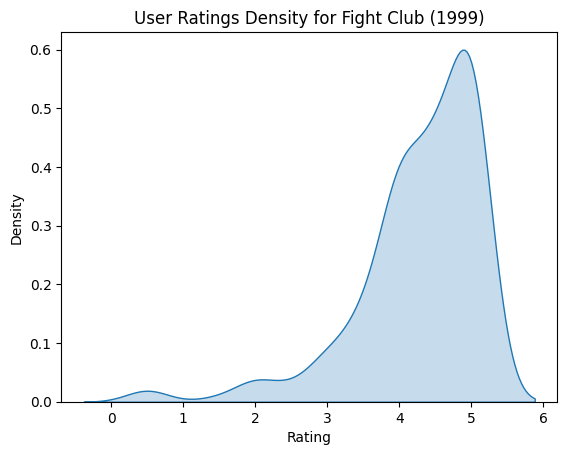

In [130]:
# Plotting the KDE plot using seaborn
sns.kdeplot(fight_club_ratings, fill=True)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('User Ratings Density for Fight Club (1999)')
plt.show()

**We can clearly see all the data points are towards right which means left skewness**

*Mand Operations : Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings*


In [131]:
# Grouping by movieId and applying count & mean on ratings
group_ratings = ratings.groupby('movieId')['rating'].agg(['count','mean']).reset_index()
group_ratings.head()

,movieId,count,mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429


In [132]:
# Renaming the col as people might not get what aggregation op has been done
group_ratings.columns = ['movieId', 'rating_count', 'rating_mean']
group_ratings.head()

,movieId,rating_count,rating_mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429


*Mand Operations : Apply inner join on dataframe created from movies.csv and the grouped df from step 1.*

In [133]:
# Apply INNER JOIN
merge_data = pd.merge(movies,group_ratings,on = 'movieId',how='inner')
merge_data.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


*Mand Operations : Filter only those movies which have more than 50 user ratings (i.e. > 50).*

In [134]:
filter_data = merge_data[merge_data['rating_count']>50]
filter_data.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


**After Mand operations : Which movie is the most popular based on  average user ratings?**


In [135]:
# Sorting the filtered dataset by 'rating_mean'(avg user ratings) in descending order
sort_by_avg_ratings = filter_data.sort_values(by='rating_mean', ascending=False)

# Getting the most popular movie (highest average rating)
most_popular_movie = sort_by_avg_ratings.iloc[0]

print("Most popular movie based on average user ratings:")
print("Title:", most_popular_movie['title'])
print("Average Rating:", most_popular_movie['rating_mean'])

Most popular movie based on average user ratings:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.429022082018927


**Select all the correct options which comes under top 5 popular movies based on number of user ratings.**

In [136]:
sort_by_ratings_count = filter_data.sort_values(by='rating_count',ascending=False)
top_5_movies = sort_by_ratings_count.head(5)
top_5_movies

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


**Which Sci-Fi movie is "third most popular" based on the number of user ratings?**

In [137]:
# Filter data for sci-fi movies
sci_fi= filter_data[filter_data['genres'].str.contains('Sci-Fi')]

# Sort by ratings count
sort_by_scifi_ratings_count = sci_fi.sort_values(by='rating_count',ascending=False)

third_most_popular_scifi = sort_by_scifi_ratings_count.iloc[2]

print("Third most popular Sci-Fi movie based on user ratings:")
print("Title:", third_most_popular_scifi['title'])
print("Number of User Ratings:", third_most_popular_scifi['rating_count'])

Third most popular Sci-Fi movie based on user ratings:
Title: Jurassic Park (1993)
Number of User Ratings: 238


🟢 IMPORTANT NOTE 2 Questions🟢

In [138]:
import pandas as pd

# Load the CSV file
links_df = pd.read_csv('links.csv')

# Print the column names
print(links_df.columns)


Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


In [139]:
final_df = pd.merge(filter_data,links, how ='inner', on = 'movieId')
final_df

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [140]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'class' : "sc-bde20123-1 cMEQkK"})
    return imdb_rating.text if imdb_rating else np.nan

In [141]:
r = []
for i in final_df['imdbId']:
    r.append(scrapper(i))

In [142]:
len(r)

436

In [143]:
rating = pd.DataFrame({'rating':r})

In [144]:
final_df = pd.concat([final_df,rating], axis=1)

In [145]:
final_df

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,NaN
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,NaN
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,NaN
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,NaN
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,NaN
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,NaN
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,NaN


We can see from the above code it has NAN reviews so lets try different approach

In [146]:
imdb = pd.read_csv('imdb.csv')

imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [147]:
imdb.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [148]:
# A new Df with only the onli specific columns
imdb_data_filtered = imdb[['Series_Title', 'Genre', 'IMDB_Rating']]

# Displaying the filtered IMDb dataset
imdb_data_filtered.head()

,Series_Title,Genre,IMDB_Rating
0,The Shawshank Redemption,Drama,9.3
1,The Godfather,"Crime, Drama",9.2
2,The Dark Knight,"Action, Crime, Drama",9.0
3,The Godfather: Part II,"Crime, Drama",9.0
4,12 Angry Men,"Crime, Drama",9.0


**Mention the movieId of the movie which has the highest IMDB rating.**


In [151]:
# Step 1: We will merge our filter_data with the 'imdbId' col of the links as LEFT JOIN

# Merge filtered_data with links_data
filter_data_with_imdb = pd.merge(filter_data, links[['movieId', 'imdbId']], on='movieId', how='left')

# Display the resulting dataset with the new 'imdbId' column
filter_data_with_imdb.head()

,movieId,title,genres,rating_count,rating_mean,imdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319


In [152]:
highest_rating = imdb_data_filtered['IMDB_Rating'].max()
highest_rated_movies = imdb_data_filtered[imdb_data_filtered['IMDB_Rating'] == highest_rating]

highest_rated_movie_names = highest_rated_movies['Series_Title']

print(f"The name of the movie with the highest rating ({highest_rating}):")
print(highest_rated_movie_names)

movie_id_shawshank = filter_data_with_imdb.loc[filter_data_with_imdb['title'] == 'Shawshank Redemption, The (1994)', 'movieId'].values[0]

print(f"The 'movieId' of 'Shawshank Redemption, The (1994)' is: {movie_id_shawshank}")

The name of the movie with the highest rating (9.3):
0    The Shawshank Redemption
Name: Series_Title, dtype: object
The 'movieId' of 'Shawshank Redemption, The (1994)' is: 318


**Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.**

In [154]:
# Filtering the Df for Sci-Fi genre
sci_fi_movies = imdb_data_filtered[imdb_data_filtered['Genre'].str.contains('Sci-Fi', case=False)]

#  TITLE

# Finding the highest-rated Sci-Fi movie
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['IMDB_Rating'].idxmax()]
highest_rated_sci_fi_movie_title = highest_rated_sci_fi_movie['Series_Title']

print("Highest-rated Sci-Fi movie:")
print(highest_rated_sci_fi_movie_title)

# ID
movie_id_inception = filter_data_with_imdb.loc[filter_data_with_imdb['title'] == 'Inception (2010)', 'movieId'].values[0]

print(f"The 'movieId' of 'Inception' is: ",{movie_id_inception})

Highest-rated Sci-Fi movie:
Inception
The 'movieId' of 'Inception' is:  {79132}
